In [87]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 15,6

warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [88]:
spot=pd.read_csv("FED-RXI_N_M_IN.csv", dtype={'value':object}, index_col=[0],parse_dates=[0])

In [89]:
spot.dtypes

Value    float64
dtype: object

In [90]:
spot.shape

(584, 1)

In [91]:
spot.head(10)

,Value
Date,
2021-08-31,74.1155
2021-07-31,74.5390
2021-06-30,73.5782
2021-05-31,73.2065
2021-04-30,74.5186
2021-03-31,72.8196
2021-02-28,72.8053
2021-01-31,73.1106
2020-12-31,73.6195


In [92]:
spot.tail(10)

,Value
Date,
1973-10-31,7.7271
1973-09-30,7.7000
1973-08-31,7.5643
1973-07-31,7.3510
1973-06-30,7.2719
1973-05-31,7.4927
1973-04-30,7.5462
1973-03-31,7.5465
1973-02-28,7.7538


In [93]:
spot.describe()

,Value
count,584.000000
mean,34.352353
std,21.229727
min,7.271900
25%,12.095425
50%,35.887650
75%,47.796950
max,76.168200


In [94]:
## Finding rolling mean 
rolmean=spot.rolling(window=12).mean()
rolstd=spot.rolling(window=12).std()
print (rolmean,rolstd)

               Value
Date                
2021-08-31       NaN
2021-07-31       NaN
2021-06-30       NaN
2021-05-31       NaN
2021-04-30       NaN
...              ...
1973-05-31  7.804608
1973-04-30  7.778000
1973-03-31  7.735483
1973-02-28  7.694600
1973-01-31  7.658467

[584 rows x 1 columns]                Value
Date                
2021-08-31       NaN
2021-07-31       NaN
2021-06-30       NaN
2021-05-31       NaN
2021-04-30       NaN
...              ...
1973-05-31  0.358929
1973-04-30  0.365775
1973-03-31  0.360042
1973-02-28  0.322943
1973-01-31  0.247742

[584 rows x 1 columns]


Text(0.5, 1.0, 'Spot Exchange price RS/$')

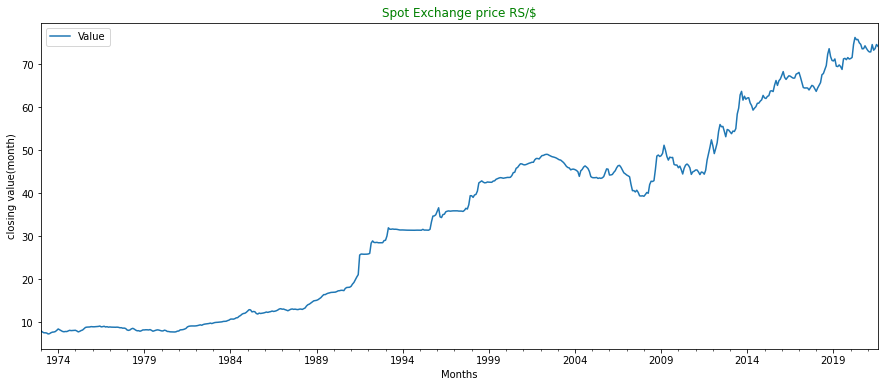

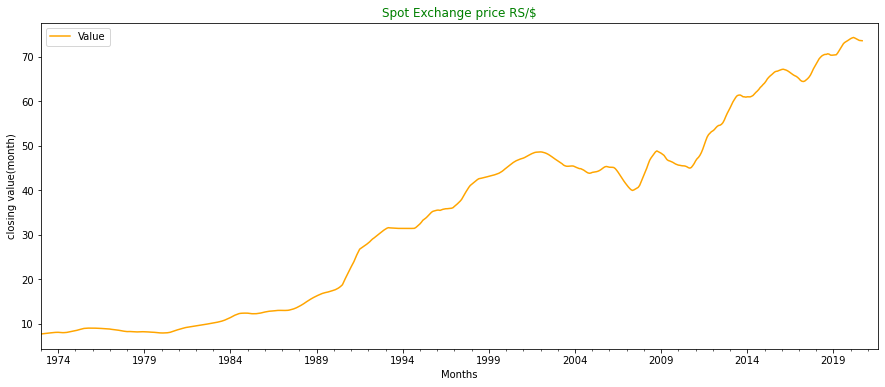

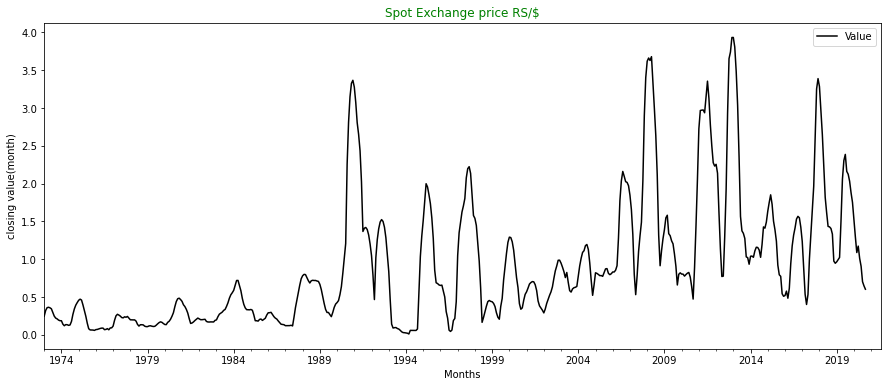

In [95]:
spot.plot()
plt.xlabel("Months")
plt.ylabel("closing value(month)")
plt.title("Spot Exchange price RS/$", color="Green")
rolmean.plot(color="orange")
plt.xlabel("Months")
plt.ylabel("closing value(month)")
plt.title("Spot Exchange price RS/$", color="Green")
rolstd.plot(color="black")
plt.xlabel("Months")
plt.ylabel("closing value(month)")
plt.title("Spot Exchange price RS/$", color="Green")

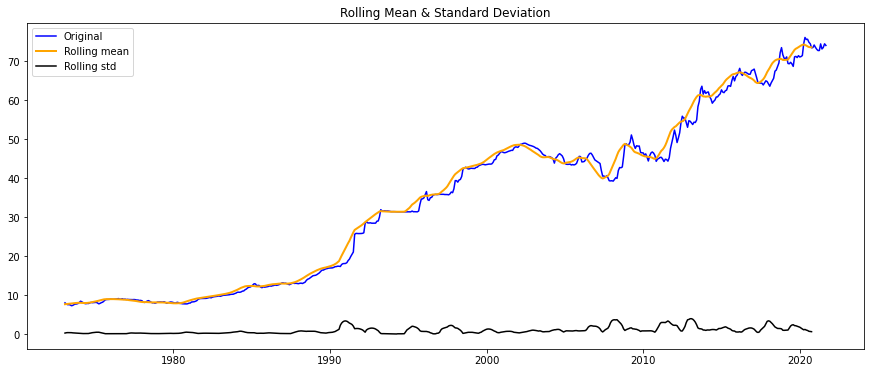

In [96]:
#Plot rolling statistics:
orig = plt.plot(spot, color='blue', label='Original')
mean = plt.plot(rolmean, color='orange',linewidth=2, label='Rolling mean')
std = plt.plot(rolstd, color='black', label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [97]:
##PERFORM DICKEY-FULLER TEST FOR CLOSING VALUE 
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

print("Results of Dickey-Fuller Test:")

spotdft=adfuller(spot['Value'], autolag='AIC')

dfoutput=pd.Series(spotdft[0:4], index=['Test Statistic', 'p-value', '#Lags used','Number of Observations used'])
for key,value in spotdft[4].items():
    dfoutput['Critical Value (%s) '%key]=value
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.393154
p-value                          0.585554
#Lags used                       5.000000
Number of Observations used    578.000000
Critical Value (1%)             -3.441714
Critical Value (5%)             -2.866553
Critical Value (10%)            -2.569440
dtype: float64


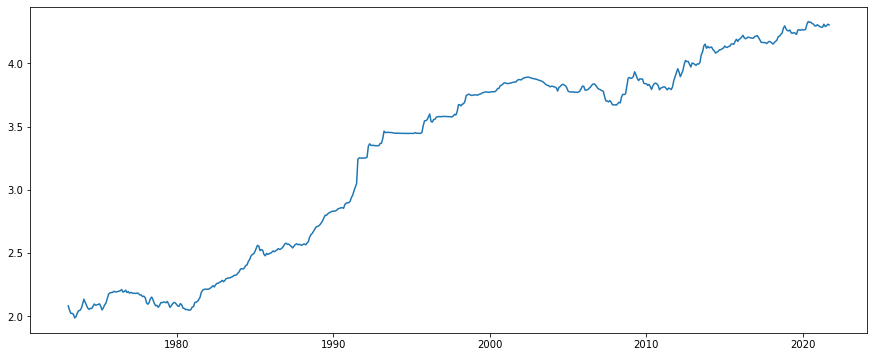

In [98]:
#Estimating trend
spot_logScale= np.log(spot)
plt.plot(spot_logScale)

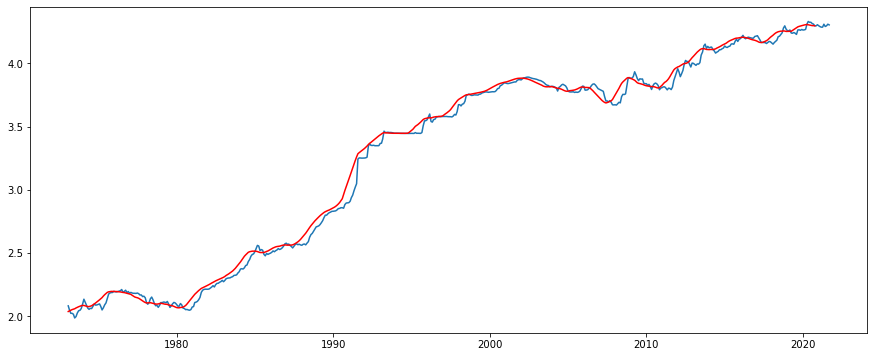

In [99]:
movingAverage= spot_logScale.rolling(window=12).mean()
movingSTD= spot_logScale.rolling(window=12).std()
plt.plot(spot_logScale)
plt.plot(movingAverage, color= 'red')

In [100]:
spotLogScaleMinusMovingAverage=spot_logScale-movingAverage
spotLogScaleMinusMovingAverage.head(12)

#remove null values
spotLogScaleMinusMovingAverage.dropna(inplace=True)
spotLogScaleMinusMovingAverage.head(10)

,Value
Date,
2020-09-30,-0.001501
2020-08-31,0.012073
2020-07-31,0.016493
2020-06-30,0.024460
2020-05-31,0.021052
2020-04-30,0.025955
2020-03-31,0.002502
2020-02-29,-0.037361
2020-01-31,-0.038755


In [101]:
##
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #determine rolling statistics
    movingAverage= timeseries.rolling(window=12).mean()
    movingSTD= timeseries.rolling(window=12).std()
    
    #plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color ='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test:
    print("Results of Dickey-Fuller Test:")
    dft = adfuller(timeseries['Value'], autolag='AIC')
    dfoutput = pd.Series(dft[0:4],index=['Test Statistic', 'p-value', '#Lags used','Number of Observations used'])
    for key, value in dft[4].items():
        dfoutput['Critical Value (%s) '%key] = value
    print(dfoutput)
   

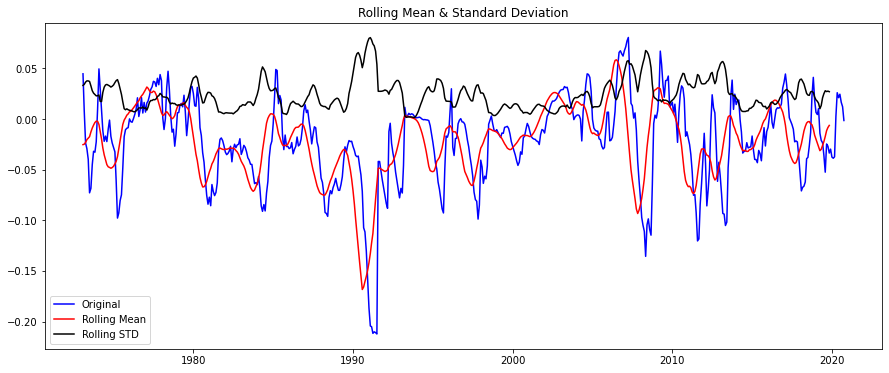

Results of Dickey-Fuller Test:
Test Statistic                -6.312419e+00
p-value                        3.210414e-08
#Lags used                     8.000000e+00
Number of Observations used    5.640000e+02
Critical Value (1%)           -3.441998e+00
Critical Value (5%)           -2.866678e+00
Critical Value (10%)          -2.569506e+00
dtype: float64


In [102]:
test_stationarity(spotLogScaleMinusMovingAverage)

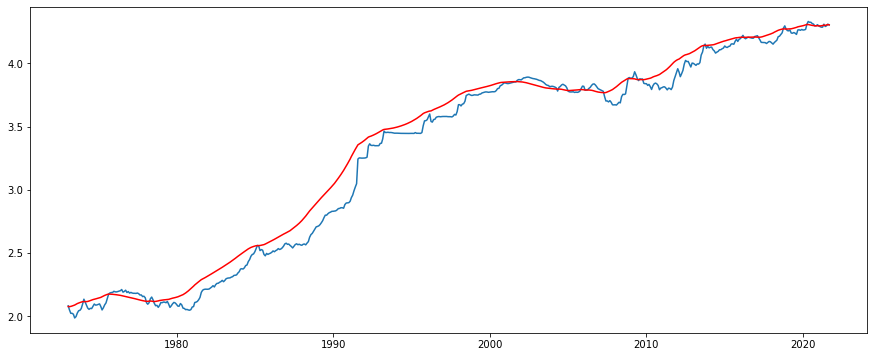

In [103]:
expDecayWeightedAverage= spot_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(spot_logScale)
plt.plot(expDecayWeightedAverage, color= "red")

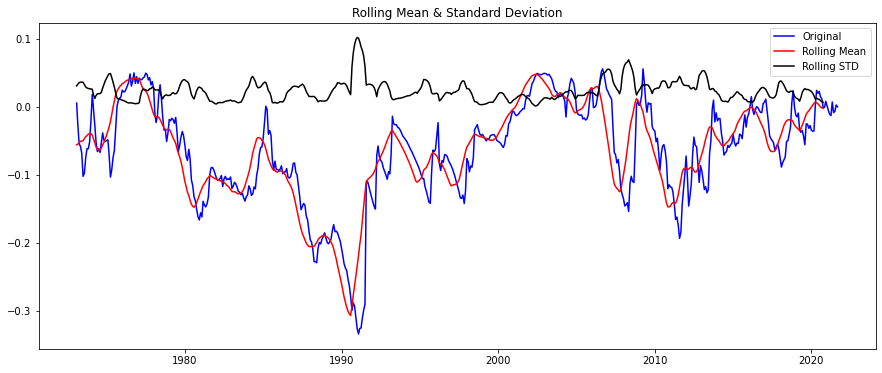

Results of Dickey-Fuller Test:
Test Statistic                  -3.183125
p-value                          0.020982
#Lags used                       2.000000
Number of Observations used    581.000000
Critical Value (1%)             -3.441655
Critical Value (5%)             -2.866527
Critical Value (10%)            -2.569426
dtype: float64


In [104]:
datasetLogScaleMinusMovingExponentialDecayAverage=spot_logScale-expDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

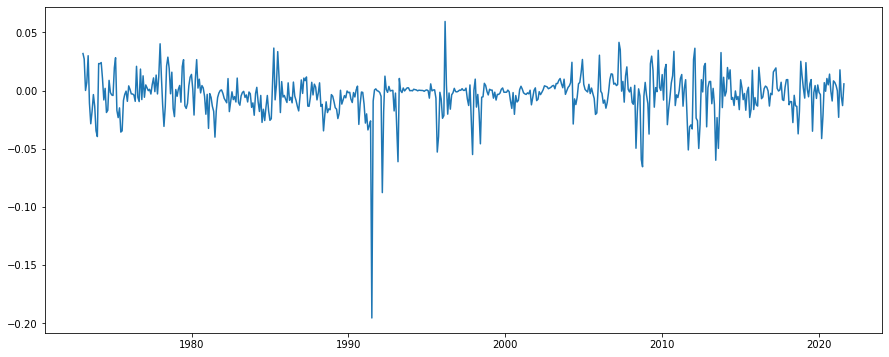

In [105]:
datasetLogDiffShifting=spot_logScale - spot_logScale.shift()
plt.plot(datasetLogDiffShifting)

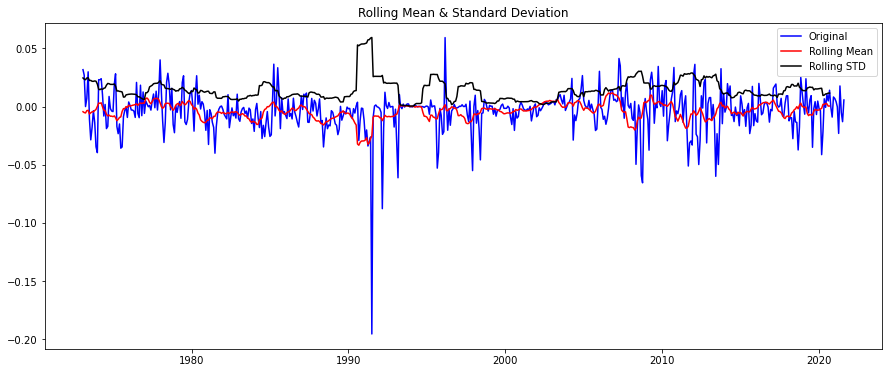

Results of Dickey-Fuller Test:
Test Statistic                -6.848174e+00
p-value                        1.721288e-09
#Lags used                     7.000000e+00
Number of Observations used    5.750000e+02
Critical Value (1%)           -3.441774e+00
Critical Value (5%)           -2.866580e+00
Critical Value (10%)          -2.569454e+00
dtype: float64


In [106]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

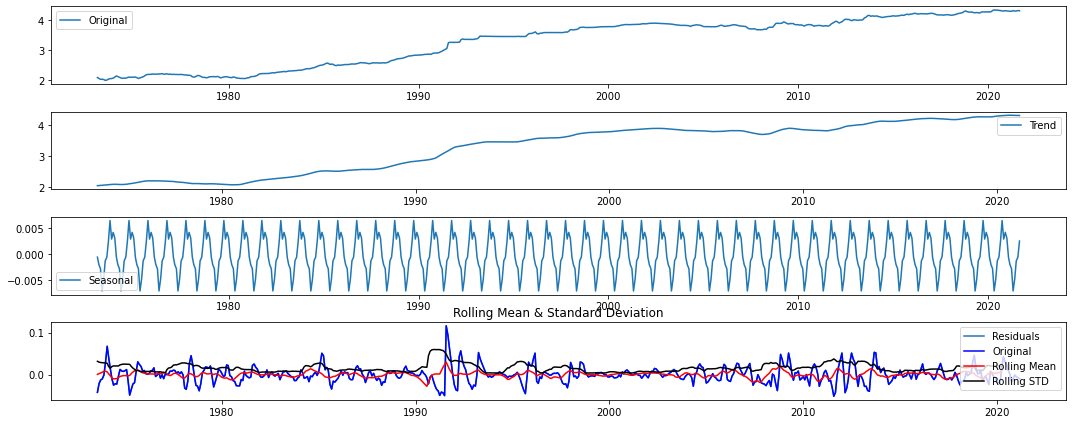

Results of Dickey-Fuller Test:
Test Statistic                -9.581655e+00
p-value                        2.150408e-16
#Lags used                     1.600000e+01
Number of Observations used    5.550000e+02
Critical Value (1%)           -3.442187e+00
Critical Value (5%)           -2.866762e+00
Critical Value (10%)          -2.569551e+00
dtype: float64


In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(spot_logScale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
residual = residual.to_frame().rename(columns = {'resid':'Value'})

plt.subplot(411)
plt.plot(spot_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

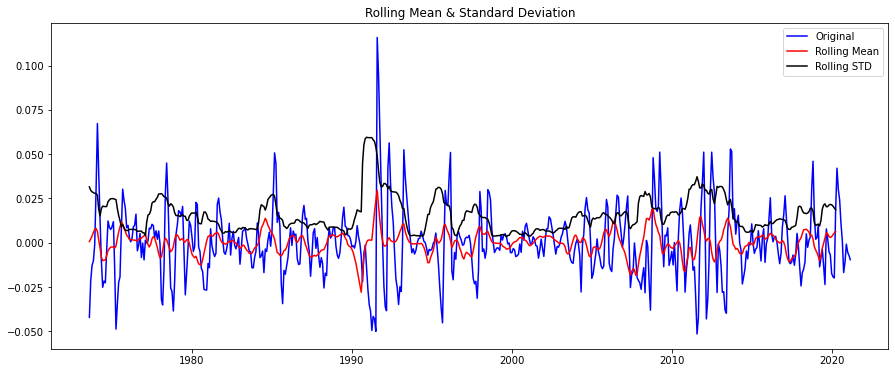

Results of Dickey-Fuller Test:
Test Statistic                -9.581655e+00
p-value                        2.150408e-16
#Lags used                     1.600000e+01
Number of Observations used    5.550000e+02
Critical Value (1%)           -3.442187e+00
Critical Value (5%)           -2.866762e+00
Critical Value (10%)          -2.569551e+00
dtype: float64


In [108]:
decomposedLogData= residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


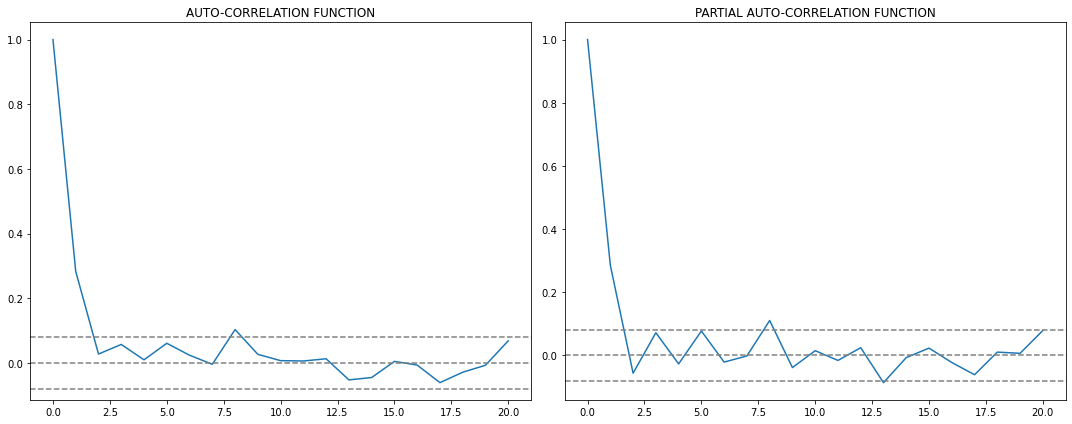

In [109]:
###to predict ACF PACF further:
from statsmodels.tsa.stattools import acf, pacf
import warnings


lag_acf=acf(datasetLogDiffShifting, nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20, method='ols')

##plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color= 'gray')
plt.title('AUTO-CORRELATION FUNCTION')

##PLOT PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color= 'gray')
plt.title('PARTIAL AUTO-CORRELATION FUNCTION')
plt.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1M will be

Plotting AR model


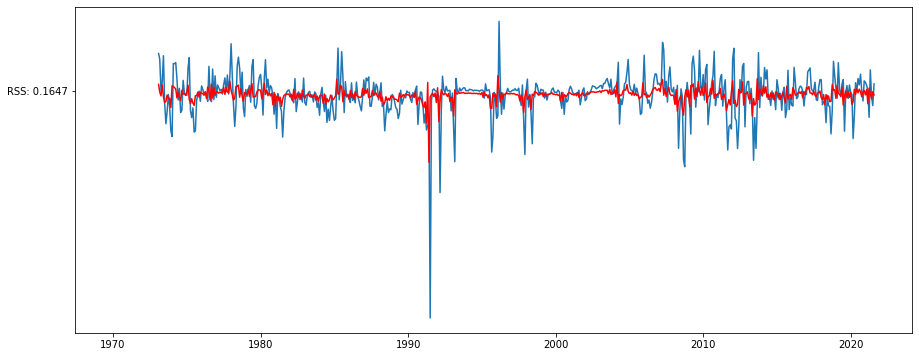

In [110]:
from statsmodels.tsa.arima_model import ARIMA

## AR model
model=ARIMA(spot_logScale, order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.plot('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Value"])**2))
print('Plotting AR model')